In [2]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'  # carpeta donde se encuentran los datasets
else:
    FUENTES_DIR = '../Fuentes/' # carpeta LOCAL donde se encuentran los scripts
    DATOS_DIR   = '../Datos/' # carpeta LOCAL donde se encuentran los datasets

import sys
sys.path.append(FUENTES_DIR)
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet
from sklearn import preprocessing
from ClassNeuronaGral import NeuronaGradiente
from ClassRNMulticlase import RNMulticlase


def openFile(nomArch, sep=None):
    file = DATOS_DIR + nomArch
    #-- detectando la codificación de caracteres usada ----
    with open(file, 'rb') as f:
        result = chardet.detect(f.read()) 
    return pd.read_csv(file, encoding=result['encoding'], sep=sep, engine='python') # or readline if the file is large

#### Ejercicio 6
Comentar la linea que actualiza el tiempo para ver como cambia en cuanto a tiempos y efectividad



#### Ejercicio 1

In [3]:
from sympy import symbols, diff
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import lambdify

# establece variables a usar en la funcion
x, y= symbols('x y', real=True)

# define la funcion
f = x/(2*x**2 + 3*y*y + 1)
f

x/(2*x**2 + 3*y**2 + 1)

In [4]:
# establece variables a usar en la funcion
x, y= symbols('x y', real=True)

# define la funcion
f = x/(2*x**2 + 3*y*y + 1)
f

x/(2*x**2 + 3*y**2 + 1)

Derivada parcial de x

In [5]:
df_dx = diff(f, x)
df_dx

-4*x**2/(2*x**2 + 3*y**2 + 1)**2 + 1/(2*x**2 + 3*y**2 + 1)

Derivada parcial de y

In [6]:
df_dy = diff(f, y)
df_dy

-6*x*y/(2*x**2 + 3*y**2 + 1)**2

a) Indique el vector gradiente para x=1 e y=-1

In [7]:
# coordenadas del punto a calcular
(px, py) = (1, -1)

# evalua la funcion f en x e y
pz = f.evalf(subs = {x:px, y:py})
print("\nDada la función f(x,y) = ", f)
print("  en (%f,%f) vale %f\n" % (px, py, pz) )

# evalua la derivada de la funcion f respecto de x en el punto (x e y)
pz = df_dx.evalf(subs = {x:px, y:py} )
print(" - La derivada respecto de x es", df_dx )
print("   y en (%f,%f) vale %f\n" % (px, py, pz) )

# evalua la derivada de la funcion f respecto de x en el punto (x e y)
pz = df_dy.evalf(subs = {x:px,y:py} )
print(" - La derivada respecto de y es", df_dy)
print("   y en (%f,%f) vale %f\n" % (px, py, pz) )


Dada la función f(x,y) =  x/(2*x**2 + 3*y**2 + 1)
  en (1.000000,-1.000000) vale 0.166667

 - La derivada respecto de x es -4*x**2/(2*x**2 + 3*y**2 + 1)**2 + 1/(2*x**2 + 3*y**2 + 1)
   y en (1.000000,-1.000000) vale 0.055556

 - La derivada respecto de y es -6*x*y/(2*x**2 + 3*y**2 + 1)**2
   y en (1.000000,-1.000000) vale 0.166667



b) Si a partir de (𝑥 =0.20; 𝑦=−1) tuviera que elegir una 
dirección en la cual la función crezca, qué acción 
tomaría? 

- i.  Incrementar los valores de x e y (Verdadero)
- ii.  Disminuir los valores de x e y 
- iii.  Incrementar el valor de x y disminuir el de y 
- iv.  Disminuir el valor de x e incrementar el de y 

c) Una vez elegida la dirección en b), el movimiento a realizar será una fracción del módulo del vector
gradiente. ¿Cuál sería la nueva posición si se considera 𝑎𝑙𝑓𝑎=0.1? ¿cuál es el valor de la función en 
la nueva ubicación? 

d) Considere nuevamente las opciones del inciso b) pero ahora debe buscar una dirección, a partir de 
(𝑥 =0.20; 𝑦=−1), en la cual la función disminuya ¿cuál sería su elección? 

In [8]:
px, py = (0.2, -1)

# la función crece en dirección al gradiente
rx = px+0.1*df_dx.evalf(subs = {x:px,y:py})
ry = py+0.1*df_dy.evalf(subs = {x:px,y:py})
rz = f.evalf(subs = {x:rx, y:ry})

# la función decrece en dirección al gradiente
sx = px-0.1*df_dx.evalf(subs = {x:px,y:py})
sy = py-0.1*df_dy.evalf(subs = {x:px,y:py})
sz = f.evalf(subs = {x:sx, y:sy})

print("\nLa función f(x,y) = ", f)
print(" en (%f,%f) vale %f" % (px, py, pz) )
print(" en (%f,%f) vale %f (crece)" % (rx, ry, rz) )
print(" en (%f,%f) vale %f (decrece)" % (sx, sy, sz) )


La función f(x,y) =  x/(2*x**2 + 3*y**2 + 1)
 en (0.200000,-1.000000) vale 0.166667
 en (0.223549,-0.992791) vale 0.055104 (crece)
 en (0.176451,-1.007209) vale 0.042977 (decrece)


e) Repita lo solicitado en c) para la dirección elegida en d) donde el objetivo fue hallar una ubicación 
donde la función tome un valor menor.

In [9]:
px, py = sx, sy

sx = px-0.1*df_dx.evalf(subs = {x:px,y:py})
sy = py-0.1*df_dy.evalf(subs = {x:px,y:py})
sz = f.evalf(subs = {x:sx, y:sy})

print(" en (%f,%f) vale %f (decrece)" % (sx, sy, sz) )

 en (0.152834,-1.013535) vale 0.037019 (decrece)


In [10]:
cota = 0.000005
dif = 1
alpha = 0.005
ite=0

while (dif >= cota):
    px, py = sx, sy
    pz = sz # Imagen de la función en el punto (px, py)

    sx = px-alpha*df_dx.evalf(subs = {x:px,y:py})
    sy = py-alpha*df_dy.evalf(subs = {x:px,y:py})
    sz = f.evalf(subs = {x:sx, y:sy})

    dif = abs(sz - pz) # Diferencia entre la nueva y la anterior imagen: |f(sx,sy) - f(px,py)|
    print(" en (%f,%f) vale %f (decrece)" % (sx, sy, sz) )
    print("Iteración %d: diferencia = %f" % (ite, dif))

    ite+=1

 en (0.151650,-1.013807) vale 0.036724 (decrece)
Iteración 0: diferencia = 0.000295
 en (0.150466,-1.014078) vale 0.036429 (decrece)
Iteración 1: diferencia = 0.000295
 en (0.149282,-1.014346) vale 0.036135 (decrece)
Iteración 2: diferencia = 0.000295
 en (0.148098,-1.014612) vale 0.035840 (decrece)
Iteración 3: diferencia = 0.000295
 en (0.146914,-1.014876) vale 0.035546 (decrece)
Iteración 4: diferencia = 0.000294
 en (0.145729,-1.015138) vale 0.035251 (decrece)
Iteración 5: diferencia = 0.000294
 en (0.144545,-1.015398) vale 0.034957 (decrece)
Iteración 6: diferencia = 0.000294
 en (0.143360,-1.015655) vale 0.034663 (decrece)
Iteración 7: diferencia = 0.000294
 en (0.142175,-1.015911) vale 0.034370 (decrece)
Iteración 8: diferencia = 0.000294
 en (0.140990,-1.016164) vale 0.034076 (decrece)
Iteración 9: diferencia = 0.000294
 en (0.139804,-1.016415) vale 0.033782 (decrece)
Iteración 10: diferencia = 0.000294
 en (0.138619,-1.016664) vale 0.033489 (decrece)
Iteración 11: diferencia =

#### Ejercicio 2

El precio de una vivienda está dado por dos factores, la proximidad a centros comerciales, financieros, vías 
y demás que se mide a través del factor j, y de la condición misma de la vivienda que se mide por el factor k. 
La relación entre estos factores y el precio de la vivienda en un barrio determinado está dada por: 
𝑃(𝑗,𝑘)=𝑘2 −2𝑗𝑘+2𝑗2 +18𝑗−20𝑘+201 
donde el precio está dado en miles de dólares. 
Utilice la técnica de descenso de gradiente para determinar los valores de j y k que minimizan el precio de 
la vivienda. 

In [11]:
j = symbols('j', real=True)
k = symbols('k', real=True)
P = k**2 - 2*j*k + 2*j**2 + 18*j - 20*k + 201
P

2*j**2 - 2*j*k + 18*j + k**2 - 20*k + 201

In [12]:
derivada_j = diff(P, j)
derivada_j

4*j - 2*k + 18

In [13]:
derivada_k = diff(P, k)
derivada_k

-2*j + 2*k - 20

In [14]:
cota = 0
dif = 1
alpha = 0.005
ite=0

sx, sy = (0, 0)
sz = P.evalf(subs = {j:sx, k:sy})

while (dif > cota):
    px, py = sx, sy
    pz = sz # Imagen de la función en el punto (px, py)

    sx = px-alpha*df_dx.evalf(subs = {x:px,y:py})
    sy = py-alpha*df_dy.evalf(subs = {x:px,y:py})
    sz = f.evalf(subs = {x:sx, y:sy})

    dif = abs(sz - pz) # Diferencia entre la nueva y la anterior imagen: |f(sx,sy) - f(px,py)|

    ite+=1

print("\nMínimo en (%f,%f) vale %f\n" % (sx, sy, sz) )


Mínimo en (-0.707107,0.000000) vale -0.353553



In [15]:
# Crear función numpy para P(j, k)
# P_func = lambdify((j, k), P, 'numpy')
# Z = P_func(j, k)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.view_init(elev=20, azim=150)
# ax.plot_surface(j, k, Z, cmap='viridis', alpha=0.9)

# # Marcar el punto mínimo encontrado
# ax.scatter(float(sx), float(sy), float(sz), color='r', s=50, label='Mínimo')
# ax.set_xlabel('j')
# ax.set_ylabel('k')
# ax.set_zlabel('P(j, k)')
# ax.legend()
# plt.show()

#### Ejercicio 3



Correlación lineal: -0.960


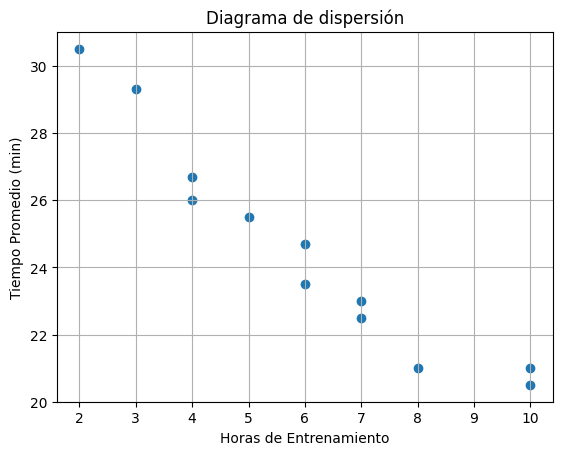

In [16]:
import pandas as pd

# Datos del ejercicio
horas_entrenamiento = [2, 3, 4, 4, 5, 6, 6, 7, 7, 8, 10, 10]
tiempo_promedio = [30.5, 29.3, 26.7, 26.0, 25.5, 24.7, 23.5, 23.0, 22.5, 21.0, 21.0, 20.5]


df_ej3 = pd.DataFrame({
    'Horas de Entrenamiento': horas_entrenamiento,
    'Tiempo Promedio (min)': tiempo_promedio
})

# Correlación lineal
correlacion = df_ej3.corr().loc['Horas de Entrenamiento', 'Tiempo Promedio (min)']
print(f"Correlación lineal: {correlacion:.3f}")

# Diagrama de dispersión
import matplotlib.pyplot as plt

plt.scatter(df_ej3['Horas de Entrenamiento'], df_ej3['Tiempo Promedio (min)'])
plt.xlabel('Horas de Entrenamiento')
plt.ylabel('Tiempo Promedio (min)')
plt.title('Diagrama de dispersión')
plt.grid(True)
plt.show()

la ecuación del error cuadrático medio que se debería minimizar si se utilizara la técnica de descenso de gradiente es
**Error Cuadrático Medio  (Mean Square Error)**
$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 \\
$$

La ecuación de error que se minimiza al utilizar la técnica de descenso de gradiente 
estocástico es
$$
𝛻𝜀_𝑘^2 = −2.𝜀_𝑘.𝑥_𝑘
$$

In [17]:
import random

horas_entrenamiento = np.array(horas_entrenamiento)
tiempo_promedio = np.array(tiempo_promedio)

X = horas_entrenamiento
Y = tiempo_promedio
b = 15

alpha = 0.01
cota = 0.0001
max_epocas = 1000

w = random.uniform(-1, 1)  # un solo peso
b = random.uniform(-1, 1)

for epoca in range(max_epocas):
    E_ant = np.sum((Y - (X * w + b))**2)

    for i in range(len(X)):
        y_pred = w * X[i] + b
        error = Y[i] - y_pred
        w = w + 2 * alpha * error * X[i]
        b = b + 2 * alpha * error

    E = np.sum((Y - (X * w + b))**2)
    if abs(E - E_ant) < cota:
        break

print("w =", w, "b =", b) # w = -1.7438452568693115 b = 34.08337011618977

w = -1.7438452637916395 b = 34.08337017365846


Aplicando descenso de gradiente estocástico (tasa de aprendizaje 𝛼 = 0.01, cota de convergencia = 0.0001, máximo de 1000 épocas) se obtuvieron los coeficientes:
$$
w = -1.7438453, b = 34.0833701
$$

La recta de regresión resultante es: $$ \hat{𝑦} = −1.7438453𝑥 + 34.0833701 $$


e- Predicción para 9 horas — cálculo manual

$$ 
𝑥 = 9
$$

$$
\hat{𝑦}(9) = −1.7438452568693115⋅9 + 34.08337011618977
$$
$$
\hat{𝑦}(9) = −15.6946073118 + 34.0833701162 ≈ 18.3887628044
$$
$$
\hat{y}(9) ≈ 18.38 minutos
$$ 	​


Según el modelo, un corredor que entrena 9 horas semanales tardaría aproximadamente 18.4 minutos en completar la distancia fija.

#### Ejercicio 4

In [18]:
df = openFile("CCPP.csv")

# [WEIGHTS, BIAS]
pesos = {
    "a" : [-2,500],
    "b" : [-2.21,498],
    "c" : [-2.30,497],
    "d" : [-2.22,496.5],
    "e" : [-2.16,496.91],
}

E = 0
E_min = 9999999

X = df['AT'].values
Y = df['PE'].values

for punto in pesos:
    w = pesos[punto][0]
    b = pesos[punto][1]

    # Calcular error cuadrático total
    E_total = np.sum((Y - (X * w + b))**2)
    # Calcular error cuadrático medio (MSE)
    E_mse = E_total / len(X)
    
    print("Punto", punto, "w =", w, "b =", b, "MSE =", E_mse)

    if E_mse < E_min:
        E_min = E_mse
        mejor_punto = punto
print("\n")
print("El mejor punto es", mejor_punto, "con error", E_min)


Punto a w = -2 b = 500 MSE = 71.16255475543478
Punto b w = -2.21 b = 498 MSE = 29.557129448862874
Punto c w = -2.3 b = 497 MSE = 36.91941198244145
Punto d w = -2.22 b = 496.5 MSE = 31.785616074548507
Punto e w = -2.16 b = 496.91 MSE = 29.448487192257524


El mejor punto es e con error 29.448487192257524


#### Ejercicio 5

In [19]:
def normalizar(df, norm):
    """
    Normaliza el DataFrame y retorna tanto los datos normalizados 
    como los scalers para poder desnormalizar después
    """
    if norm == 1:  # Min-Max
        scaler_X = preprocessing.MinMaxScaler()
        scaler_Y = preprocessing.MinMaxScaler()
        
        # Normalizar X e Y por separado
        X_norm = scaler_X.fit_transform(df[['engine-size']])
        Y_norm = scaler_Y.fit_transform(df[['price']])
        
        df_norm = pd.DataFrame({
            'engine-size': X_norm.flatten(),
            'price': Y_norm.flatten()
        })
        
        return df_norm, scaler_X, scaler_Y
        
    elif norm == 2:  # Z-score
        scaler_X = preprocessing.StandardScaler()
        scaler_Y = preprocessing.StandardScaler()
        
        # Normalizar X e Y por separado
        X_norm = scaler_X.fit_transform(df[['engine-size']])
        Y_norm = scaler_Y.fit_transform(df[['price']])
        
        df_norm = pd.DataFrame({
            'engine-size': X_norm.flatten(),
            'price': Y_norm.flatten()
        })
        
        return df_norm, scaler_X, scaler_Y
        
    else:
        return df.copy(), None, None

In [20]:
from ClassNeuronaLineal import NeuronaLineal

df = openFile("automobile-simple.csv")

mean = df["price"].mean()
df.fillna({"price": mean}, inplace=True)


df = df[["price", "engine-size"]]

# Probar ambos tipos de normalización
for tipo in [1, 2]:
    print(f"\n{'='*50}")
    print(f"NORMALIZACIÓN TIPO {tipo}")
    print(f"{'='*50}")
    
    # Normalizar datos
    df_norm, scaler_X, scaler_Y = normalizar(df, tipo)
    
    # Preparar datos de entrenamiento
    X = df_norm[['engine-size']].values
    Y = df_norm[['price']].values
    
    # Entrenar modelo
    nl = NeuronaLineal(alpha=alpha, n_iter=max_epocas, cotaE=cota, draw=0, title=['X','Y'])
    nl.fit(X, Y)

    print(f"Pesos del modelo (normalizados): w={nl.w_}, b={nl.b_}")
    
    # PREDICCIÓN CORRECTA
    # 1. Normalizar la entrada
    x_test = 100  # engine-size = 100
    if scaler_X is not None:
        x_test_norm = scaler_X.transform([[x_test]])[0][0]
    else:
        x_test_norm = x_test
    
    # 2. Predecir con datos normalizados
    y_pred_norm = np.dot([x_test_norm], nl.w_) + nl.b_
    
    # 3. Desnormalizar la salida
    if scaler_Y is not None:
        y_pred_real = scaler_Y.inverse_transform([[y_pred_norm[0]]])[0][0]
    else:
        y_pred_real = y_pred_norm[0]
    
    print(f"Entrada original: engine-size = {x_test}")
    print(f"Entrada normalizada: {x_test_norm:.4f}")
    print(f"Predicción normalizada: {np.array(y_pred_norm).flatten()[0]:.4f}")
    print(f"Predicción REAL (desnormalizada): ${y_pred_real:.2f}")
    
    # Comparar con algunos valores reales
    print(f"\nComparación con datos reales:")
    print(f"Rango original engine-size: {df['engine-size'].min():.1f} - {df['engine-size'].max():.1f}")
    print(f"Rango original price: ${df['price'].min():.0f} - ${df['price'].max():.0f}")






NORMALIZACIÓN TIPO 1
Pesos del modelo (normalizados): w=[1.05290954], b=[-0.06739933]
Entrada original: engine-size = 100
Entrada normalizada: 0.1472
Predicción normalizada: 0.0876
Predicción REAL (desnormalizada): $8644.98

Comparación con datos reales:
Rango original engine-size: 61.0 - 326.0
Rango original price: $5118 - $45400

NORMALIZACIÓN TIPO 2
Pesos del modelo (normalizados): w=[0.8383187], b=[-0.02758058]
Entrada original: engine-size = 100
Entrada normalizada: -0.6477
Predicción normalizada: -0.5706
Predicción REAL (desnormalizada): $8728.30

Comparación con datos reales:
Rango original engine-size: 61.0 - 326.0
Rango original price: $5118 - $45400


/home/santi/Documentos/Cuarto/Deep Learning/mi_entorno/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/santi/Documentos/Cuarto/Deep Learning/mi_entorno/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def calcular_metricas(Y_real, Y_pred):
    """Calcula métricas de evaluación"""
    mse = np.mean((Y_real - Y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(Y_real - Y_pred))
    
    # R² (coeficiente de determinación)
    ss_res = np.sum((Y_real - Y_pred) ** 2)
    ss_tot = np.sum((Y_real - np.mean(Y_real)) ** 2)
    r2 = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0
    
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

def evaluar_normalizacion(df, tipo_norm, nombre_norm):
    """Evalúa una estrategia de normalización específica"""
    print(f"\n{'='*60}")
    print(f"EVALUANDO: {nombre_norm}")
    print(f"{'='*60}")
    
    # Dividir datos antes de normalizar
    X_orig = df[['engine-size']].values
    Y_orig = df[['price']].values
    
    # Split train/validation
    X_train_orig, X_val_orig, Y_train_orig, Y_val_orig = train_test_split(
        X_orig, Y_orig, test_size=0.2, random_state=42
    )

    if tipo_norm == 1:  # Min-Max
        scaler_X = preprocessing.MinMaxScaler()
        scaler_Y = preprocessing.MinMaxScaler()
        
        X_train = scaler_X.fit_transform(X_train_orig)
        Y_train = scaler_Y.fit_transform(Y_train_orig)
        X_val = scaler_X.transform(X_val_orig)
        Y_val = scaler_Y.transform(Y_val_orig)
        
    elif tipo_norm == 2:  # Z-score
        scaler_X = preprocessing.StandardScaler()
        scaler_Y = preprocessing.StandardScaler()
        
        X_train = scaler_X.fit_transform(X_train_orig)
        Y_train = scaler_Y.fit_transform(Y_train_orig)
        X_val = scaler_X.transform(X_val_orig)
        Y_val = scaler_Y.transform(Y_val_orig)
    
    # Entrenar modelo
    nl = NeuronaLineal(alpha=0.01, n_iter=1000, cotaE=0.00001, draw=0)
    
    # Capturar información del entrenamiento
    historial_error = []
    error_inicial = None
    convergio = False
    
    try:
        nl.fit(X_train, Y_train)
        convergio = True
        
        # Hacer predicciones
        Y_train_pred = nl.predict(X_train)
        Y_val_pred = nl.predict(X_val)
        
        # Desnormalizar predicciones si es necesario
        if scaler_Y is not None:
            Y_train_pred_real = scaler_Y.inverse_transform(Y_train_pred.reshape(-1, 1)).flatten()
            Y_val_pred_real = scaler_Y.inverse_transform(Y_val_pred.reshape(-1, 1)).flatten()
        else:
            Y_train_pred_real = Y_train_pred
            Y_val_pred_real = Y_val_pred
        
        # Calcular métricas
        metricas_train = calcular_metricas(Y_train_orig.flatten(), Y_train_pred_real)
        metricas_val = calcular_metricas(Y_val_orig.flatten(), Y_val_pred_real)
        
    except Exception as e:
        print(f"❌ ERROR en entrenamiento: {e}")
        return None
    
    # Análisis de estabilidad numérica
    pesos_estables = np.abs(nl.w_[0]) < 1e6 and np.abs(nl.b_) < 1e6
    
    # Reporte de resultados
    print(f"✅ Convergencia: {'SÍ' if convergio else 'NO'}")
    print(f"✅ Estabilidad numérica: {'SÍ' if pesos_estables else 'NO'}")
    print(f"📊 Pesos finales: w={nl.w_}, b={nl.b_}")
    
    print(f"\n📈 MÉTRICAS DE ENTRENAMIENTO:")
    for metric, value in metricas_train.items():
        print(f"   {metric}: {value:.4f}")
    
    print(f"\n🎯 MÉTRICAS DE VALIDACIÓN:")
    for metric, value in metricas_val.items():
        print(f"   {metric}: {value:.4f}")
    
    # Ejemplo de predicción
    ejemplo_x = 100
    if scaler_X is not None:
        ejemplo_x_norm = scaler_X.transform([[ejemplo_x]])[0][0]
        ejemplo_pred_norm = np.dot([ejemplo_x_norm], nl.w_) + nl.b_
        ejemplo_pred_real = scaler_Y.inverse_transform([[ejemplo_pred_norm[0]]])[0][0]
    else:
        ejemplo_pred_real = np.dot([ejemplo_x], nl.w_) + nl.b_
    
    print(f"\n🔍 EJEMPLO: engine-size={ejemplo_x} → precio=${ejemplo_pred_real}")
    
    return {
        'nombre': nombre_norm,
        'convergio': convergio,
        'estable': pesos_estables,
        'metricas_train': metricas_train,
        'metricas_val': metricas_val,
        'w': nl.w_[0],
        'b': nl.b_,
        'ejemplo_pred': ejemplo_pred_real
    }

# EJECUTAR COMPARACIÓN
df = openFile("automobile-simple.csv")
mean = df["price"].mean()
df.fillna({"price": mean}, inplace=True)
df = df[["price", "engine-size"]]

# Evaluar las tres estrategias
resultados = []

estrategias = [
    (1, "NORMALIZACIÓN MIN-MAX"),
    (2, "NORMALIZACIÓN Z-SCORE")
]

for tipo, nombre in estrategias:
    resultado = evaluar_normalizacion(df, tipo, nombre)
    if resultado:
        resultados.append(resultado)

# COMPARACIÓN FINAL
print(f"\n{'='*80}")
print("COMPARACIÓN FINAL")
print(f"{'='*80}")

print(f"{'Estrategia':<25} {'MSE Val':<12} {'R² Val':<12} {'Estable':<10} {'Converge':<10}")
print(f"{'-'*80}")

mejor_mse = float('inf')
mejor_estrategia = None

for r in resultados:
    mse_val = r['metricas_val']['MSE']
    r2_val = r['metricas_val']['R²']
    estable = '✅' if r['estable'] else '❌'
    converge = '✅' if r['convergio'] else '❌'
    
    print(f"{r['nombre']:<25} {mse_val:<12.2f} {r2_val:<12.4f} {estable:<10} {converge:<10}")
    
    # Determinar la mejor (menor MSE en validación + estabilidad)
    if r['estable'] and r['convergio'] and mse_val < mejor_mse:
        mejor_mse = mse_val
        mejor_estrategia = r['nombre']

print(f"\n MEJOR ESTRATEGIA: {mejor_estrategia}")
print(f"   Criterio: Menor MSE en validación con estabilidad numérica")

# ANÁLISIS ADICIONAL
print(f"\n ANÁLISIS DETALLADO:")
print("- MSE más bajo = mejor ajuste a los datos")
print("- R² más alto = mejor explicación de la varianza")
print("- Estabilidad numérica = pesos no explotan")
print("- Convergencia = el algoritmo encuentra una solución")


EVALUANDO: NORMALIZACIÓN MIN-MAX
✅ Convergencia: SÍ
✅ Estabilidad numérica: SÍ
📊 Pesos finales: w=[1.0119842], b=[-0.02777345]

📈 MÉTRICAS DE ENTRENAMIENTO:
   MSE: 15837021.5001
   RMSE: 3979.5755
   MAE: 2910.2836
   R²: 0.7246

🎯 MÉTRICAS DE VALIDACIÓN:
   MSE: 16164330.2998
   RMSE: 4020.4888
   MAE: 2729.3384
   R²: 0.7927

🔍 EJEMPLO: engine-size=100 → precio=$8776.348798360075

EVALUANDO: NORMALIZACIÓN Z-SCORE
✅ Convergencia: SÍ
✅ Estabilidad numérica: SÍ
📊 Pesos finales: w=[0.83504354], b=[-0.01622533]

📈 MÉTRICAS DE ENTRENAMIENTO:
   MSE: 15842291.9459
   RMSE: 3980.2377
   MAE: 2936.1076
   R²: 0.7245

🎯 MÉTRICAS DE VALIDACIÓN:
   MSE: 16288937.0125
   RMSE: 4035.9555
   MAE: 2749.4970
   R²: 0.7911

🔍 EJEMPLO: engine-size=100 → precio=$8869.84570927556

COMPARACIÓN FINAL
Estrategia                MSE Val      R² Val       Estable    Converge  
--------------------------------------------------------------------------------
NORMALIZACIÓN MIN-MAX     16164330.30  0.7927       

#### Ejercicio 6

In [22]:
# -------------------------------- DUDAS --------------------------------
# Está bien pensado? o se esperaba otra cosa?

import numpy as np
from ClassNeuronaLineal import NeuronaLineal

random_state = 12
rgen = np.random.RandomState(random_state)

# Todas las combinaciones de 3 bits
X = np.array([
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1]
])

# Y el equivalente decimal
Y = np.array([0,1,2,3,4,5,6,7])

cota = 0.000001
alpha = 0.01
max_epocas = 100000
w = rgen.uniform(-0.5, 0.5, size= X.shape[1]) 
b = rgen.uniform(-0.5, 0.5)

error = 0

# Entrenamiento
for epoch in range(max_epocas):
    # Cálculo de predicciones
    Y_pred = X @ w + b
    # Cálculo del error o residuo
    error = Y - Y_pred
    
    # Gradientes
    grad_w = -(2/len(X)) * X.T @ error
    grad_b = -(2/len(X)) * np.sum(error)

    # Actualización de pesos y bias
    w = w - alpha * grad_w
    b = b - alpha * grad_b
    
    # Cálculo del error cuadrático medio
    E = np.mean(error**2)

    if E < cota:  # o criterio de cambio chico
        break



print("Pesos:", w, "Bias:", b)

# Test
T = np.array([0,2,5,])
X_test = np.array([
    [0,0,0],
    [0,1,0],
    [1,0,1],
])
predicciones = X_test @ w + b
for i in range(len(X_test)):
    print(f"Entrada: {X_test[i]} → Predicción: {predicciones[i]:.2f} (Real: {T[i]})")


Pesos: [3.99888652 1.99889179 0.99889286] Bias: 0.0019218965828682866
Entrada: [0 0 0] → Predicción: 0.00 (Real: 0)
Entrada: [0 1 0] → Predicción: 2.00 (Real: 2)
Entrada: [1 0 1] → Predicción: 5.00 (Real: 5)


#### Ejercicio 7

In [ ]:

df = openFile("autos.csv")

#-- seleccionar los atributos numéricos --
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"], errors='coerce')
df["bore"] = pd.to_numeric(df["bore"], errors='coerce')
df["stroke"] = pd.to_numeric(df["stroke"], errors='coerce')
df["horsepower"] = pd.to_numeric(df["horsepower"], errors='coerce')
df["peak-rpm"] = pd.to_numeric(df["peak-rpm"], errors='coerce')
df["price"] = pd.to_numeric(df["price"], errors='coerce')

df = df.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"])

# np.number te da todos los tipos numéricos

# imprime valores nulos
nomAtrib = np.array(df.columns.values).reshape(-1,1)


#-- ver si tienen datos faltantes --
values = {'normalized-losses': df['normalized-losses'].mean(),
          'bore': df['bore'].mean(),
          'stroke': df['stroke'].mean(),
          'horsepower': df['horsepower'].mean(),
          'peak-rpm': df['peak-rpm'].mean(),
          'price': df['price'].mean()}

# reemplaza valores nulos por los indicados en el diccionario values
df = df.fillna(value=values)

# Normalizar los valores
scaler = preprocessing.StandardScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

nl = NeuronaLineal(alpha=0.01, n_iter=1000, cotaE=0.00001, draw=0)

# Pasamos los datos a numpy
X = df_norm.drop(columns=['price']).to_numpy()
Y = df_norm['price'].to_numpy().reshape(-1,1) # Hacemos reshape para que Y sea una matriz columna y no un vector

nl.fit(X, Y)
w = nl.w_
b = nl.b_

print(sorted(w.tolist(), reverse=True))

# ---   ------------------------ DUDAS ----------------------------------
# Los pesos más significativos serían los que más se acercan a 1 o -1?

[0.5498627941845026, 0.2955729720119483, 0.1399763605510832, 0.13603197751513818, 0.09936396491963406, 0.032592112599163336, 0.018835176156159057, -0.00493137746789675, -0.009816037873523538, -0.022991196551907248, -0.03505928677200305, -0.04247889776327803, -0.05275180772894489, -0.0636873707660166, -0.09934169035688499]


#### Ejercicio 8

In [24]:
df = openFile("semillas.csv")
from sklearn.utils import shuffle


# Normalizar datos
scaler = preprocessing.StandardScaler()
df_norm = df.drop(columns=["Clase"])
df_norm = pd.DataFrame(scaler.fit_transform(df_norm), columns=df_norm.columns)
df["Clase"] = df["Clase"].map({"Tipo1": 1, "Tipo2": 2, "Tipo3": 3})

# Dividir datos: de entrenamiento y de testing
X = df_norm.to_numpy()
Y = (df["Clase"] == 2).astype(int) # 1 si es Tipo2, 0 en otro caso

X, Y = shuffle(X, Y, random_state=42)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.4, shuffle=True, random_state=42
)

In [25]:
# neurona no lineal sigmoid
ERROR = 0.000001
FUN = 'sigmoid'
MAX_ITE = 1000

print('\nNeurona con %s' %FUN)

def sigmoide(alpha):

    # Entrena perceptrón
    modelo = NeuronaGradiente(alpha=alpha, n_iter=MAX_ITE, FUN=FUN, cotaE=ERROR)
    modelo.fit(X_train, Y_train)
    (W, b, iteraciones) = (modelo.w_, modelo.b_, len(modelo.errors_))

    Y_pred = modelo.predict(X_test)

    efectividad = 100.0*np.sum(Y_pred==Y_test)/len(Y_pred)

    # Calcular efectividad usando modelo.accuracy
    # efectividad = modelo.accuracy(Y_pred, T_test) * 100.0
    print("Efectividad de la neurona: %.2f%% en %d iteraciones" % (efectividad, iteraciones))
    print("-" * 40)
    # Imprimir evolución de los errores con dos decimales
    errores_redondeados = [f"{float(e):.2f}" for e in modelo.errors_]



Neurona con sigmoid


In [26]:
alpha = 0.005

for i in range(1,20):
    print("\n\n***** Iteración %d con alpha=%f *****" % (i, alpha))
    sigmoide(alpha)
    alpha += 0.005



***** Iteración 1 con alpha=0.005000 *****
Efectividad de la neurona: 96.43% en 1000 iteraciones
----------------------------------------


***** Iteración 2 con alpha=0.010000 *****
Efectividad de la neurona: 97.62% en 1000 iteraciones
----------------------------------------


***** Iteración 3 con alpha=0.015000 *****
Efectividad de la neurona: 97.62% en 1000 iteraciones
----------------------------------------


***** Iteración 4 con alpha=0.020000 *****
Efectividad de la neurona: 97.62% en 1000 iteraciones
----------------------------------------


***** Iteración 5 con alpha=0.025000 *****
Efectividad de la neurona: 97.62% en 1000 iteraciones
----------------------------------------


***** Iteración 6 con alpha=0.030000 *****
Efectividad de la neurona: 97.62% en 1000 iteraciones
----------------------------------------


***** Iteración 7 con alpha=0.035000 *****
Efectividad de la neurona: 97.62% en 1000 iteraciones
----------------------------------------


***** Iteración 8 

In [27]:
from sklearn.utils import shuffle

# neurona no lineal tanh
ERROR = 1e-04
FUN = 'tanh'
MAX_ITE = 1000

df = openFile("semillas.csv")

# Normalizar datos
scaler = preprocessing.StandardScaler()
df_norm = df.drop(columns=["Clase"])
df_norm = pd.DataFrame(scaler.fit_transform(df_norm), columns=df_norm.columns)

df_norm["Clase"] = df["Clase"].map({"Tipo1": 1, "Tipo2": 2, "Tipo3": 3})
df_norm["Clase"] = (df_norm["Clase"]).astype(int)


# Dividir datos: de entrenamiento y de testing
X = df_norm.to_numpy()
Y = 2 * (df_norm["Clase"] == 2) - 1

print(Y)



# Mezclar bien los datos antes de dividir

X, Y = shuffle(X, Y, random_state=42)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.4, shuffle=True, random_state=40
)

print("Cantidad de valores Y_test == -1:", np.sum(Y_test == -1))
print("Cantidad de valores Y_test != -1:", np.sum(Y_test != -1))

print('\nNeurona con %s' %FUN)

def tangente(alpha):
    
    # Entrenar perceptrón
    modelo = NeuronaGradiente(alpha=alpha, n_iter=MAX_ITE, FUN=FUN, cotaE=ERROR)
    modelo.fit(X_train, Y_train)
    (W, b, iteraciones) = (modelo.w_, modelo.b_, len(modelo.errors_))

    Y_pred = modelo.predict(X_test)

    efectividad = 100.0*np.sum(Y_pred==Y_test)/len(Y_pred)

    # Calcular efectividad usando modelo.accuracy
    # efectividad = modelo.accuracy(Y_pred, T_test) * 100.0
    print(f"En {iteraciones} iteraciones, efectividad de la neurona: {efectividad:.2f}% con alpha={alpha}")
    print({"-"*40})

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
205   -1
206   -1
207   -1
208   -1
209   -1
Name: Clase, Length: 210, dtype: int64
Cantidad de valores Y_test == -1: 55
Cantidad de valores Y_test != -1: 29

Neurona con tanh


In [28]:
alpha = 0.04

for i in range(1, 21):
    print(f"\n\n***** Iteración {i} con alpha={alpha} *****")
    tangente(alpha)
    alpha += 0.04



***** Iteración 1 con alpha=0.04 *****
En 1000 iteraciones, efectividad de la neurona: 98.81% con alpha=0.04
{'----------------------------------------'}


***** Iteración 2 con alpha=0.08 *****
En 1000 iteraciones, efectividad de la neurona: 98.81% con alpha=0.08
{'----------------------------------------'}


***** Iteración 3 con alpha=0.12 *****
En 1000 iteraciones, efectividad de la neurona: 98.81% con alpha=0.12
{'----------------------------------------'}


***** Iteración 4 con alpha=0.16 *****
En 868 iteraciones, efectividad de la neurona: 98.81% con alpha=0.16
{'----------------------------------------'}


***** Iteración 5 con alpha=0.2 *****
En 768 iteraciones, efectividad de la neurona: 98.81% con alpha=0.2
{'----------------------------------------'}


***** Iteración 6 con alpha=0.24000000000000002 *****
En 684 iteraciones, efectividad de la neurona: 98.81% con alpha=0.24000000000000002
{'----------------------------------------'}


***** Iteración 7 con alpha=0.28 ****

#### Ejercicio 9

In [46]:
df = openFile('Vinos.csv')


def entrenar_y_testear(funcion_activacion, funcion_de_costo, tamanio_test, velocidad_aprendizaje): # La función de costo puede ser 'ECM' , 'EC_binaria' o 'EC' (Entropía cruzada)
    # Cargar y preparar los datos
    X = df.drop(columns=['Class']).to_numpy()
    Y = (df['Class'] == 'Tipo2').astype(int).to_numpy()

    if funcion_activacion == 'tanh':
        Y = 2 * Y - 1  # -1 y 1

    # Mezclar bien los datos antes de dividir
    X, Y = shuffle(X, Y, random_state=42)

    # Dividir datos: de entrenamiento y de testing
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=tamanio_test, shuffle=True, random_state=42
    )

    # Normalizar datos 
    scaler = preprocessing.StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Generar neurona
    error = 0.0001
    max_ite = 400

    print(f"\n\n***** Iteración {i} con alpha={velocidad_aprendizaje} *****")
    
    modelo = NeuronaGradiente(alpha=velocidad_aprendizaje, n_iter=max_ite, FUN=funcion_activacion, COSTO=funcion_de_costo, cotaE=error)

    # Entrenar el modelo
    modelo.fit(X_train, Y_train)

    # Evaluar modelo con datos de entrenamiento
    Y_train_pred = modelo.predict(X_train)

    train_accuracy = np.sum(Y_train_pred == Y_train) / len(Y_train_pred) * 100.0
    print(f"Train Accuracy: {train_accuracy}")

    # Evaluar modelo
    Y_pred = modelo.predict(X_test)
    accuracy = np.sum(Y_pred == Y_test) / len(Y_pred) * 100.0
    print(f"Test accuracy: {accuracy}")
    print("\n\n")


In [47]:
print("--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.01 --- Test = 50%")
entrenar_y_testear(funcion_activacion='sigmoid', funcion_de_costo='ECM', tamanio_test=0.5, velocidad_aprendizaje=0.01)

print("--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.02  --- Test = 50%")
entrenar_y_testear(funcion_activacion='sigmoid', funcion_de_costo='ECM', tamanio_test=0.5, velocidad_aprendizaje=0.02)

print("--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.03  --- Test = 50%")
entrenar_y_testear(funcion_activacion='sigmoid', funcion_de_costo='ECM', tamanio_test=0.5, velocidad_aprendizaje=0.03)


--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.01 --- Test = 50%


***** Iteración 20 con alpha=0.01 *****
Train Accuracy: 100.0
Test accuracy: 100.0



--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.02  --- Test = 50%


***** Iteración 20 con alpha=0.02 *****
Train Accuracy: 100.0
Test accuracy: 100.0



--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.03  --- Test = 50%


***** Iteración 20 con alpha=0.03 *****
Train Accuracy: 100.0
Test accuracy: 100.0





In [31]:
print("--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.01  --- Test = 40%")
entrenar_y_testear(funcion_activacion='sigmoid', funcion_de_costo='ECM', tamanio_test=0.4, velocidad_aprendizaje=0.01)


print("--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.02  --- Test = 40%")
entrenar_y_testear(funcion_activacion='sigmoid', funcion_de_costo='ECM', tamanio_test=0.4, velocidad_aprendizaje=0.02)

print("--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.03  --- Test = 40%")
entrenar_y_testear(funcion_activacion='sigmoid', funcion_de_costo='ECM', tamanio_test=0.4, velocidad_aprendizaje=0.03)

--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.01  --- Test = 40%


***** Iteración 20 con alpha=0.01 *****
Train Accuracy: 100.0
Test accuracy: 100.0



--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.02  --- Test = 40%


***** Iteración 20 con alpha=0.02 *****
Train Accuracy: 100.0
Test accuracy: 100.0



--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.03  --- Test = 40%


***** Iteración 20 con alpha=0.03 *****
Train Accuracy: 100.0
Test accuracy: 100.0





In [32]:
print("--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.01  --- Test = 30%")
entrenar_y_testear(funcion_activacion='sigmoid', funcion_de_costo='ECM', tamanio_test=0.3, velocidad_aprendizaje=0.01)


print("--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.02  --- Test = 30%")
entrenar_y_testear(funcion_activacion='sigmoid', funcion_de_costo='ECM', tamanio_test=0.3, velocidad_aprendizaje=0.02)

print("--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.03  --- Test = 30%")
entrenar_y_testear(funcion_activacion='sigmoid', funcion_de_costo='ECM', tamanio_test=0.3, velocidad_aprendizaje=0.03)

--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.01  --- Test = 30%


***** Iteración 20 con alpha=0.01 *****
Train Accuracy: 100.0
Test accuracy: 100.0



--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.02  --- Test = 30%


***** Iteración 20 con alpha=0.02 *****
Train Accuracy: 100.0
Test accuracy: 100.0



--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.03  --- Test = 30%


***** Iteración 20 con alpha=0.03 *****
Train Accuracy: 100.0
Test accuracy: 100.0





In [33]:
print("--- Probando con función sigmoide y costo EC_binaria ---  Velocidad de aprendizaje 0.01 --- Test = 50%")
entrenar_y_testear(funcion_activacion='sigmoid', funcion_de_costo='EC_binaria', tamanio_test=0.5, velocidad_aprendizaje=0.01)

print("--- Probando con función sigmoide y costo EC_binaria ---  Velocidad de aprendizaje 0.02  --- Test = 50%")
entrenar_y_testear(funcion_activacion='sigmoid', funcion_de_costo='EC_binaria', tamanio_test=0.5, velocidad_aprendizaje=0.02)

print("--- Probando con función sigmoide y costo EC_binaria ---  Velocidad de aprendizaje 0.03  --- Test = 50%")
entrenar_y_testear(funcion_activacion='sigmoid', funcion_de_costo='EC_binaria', tamanio_test=0.5, velocidad_aprendizaje=0.03)

--- Probando con función sigmoide y costo EC_binaria ---  Velocidad de aprendizaje 0.01 --- Test = 50%


***** Iteración 20 con alpha=0.01 *****
Train Accuracy: 100.0
Test accuracy: 100.0



--- Probando con función sigmoide y costo EC_binaria ---  Velocidad de aprendizaje 0.02  --- Test = 50%


***** Iteración 20 con alpha=0.02 *****
Train Accuracy: 100.0
Test accuracy: 100.0



--- Probando con función sigmoide y costo EC_binaria ---  Velocidad de aprendizaje 0.03  --- Test = 50%


***** Iteración 20 con alpha=0.03 *****
Train Accuracy: 100.0
Test accuracy: 100.0





In [34]:
print("--- Probando con función sigmoide y costo EC_binaria ---  Velocidad de aprendizaje 0.01 --- Test = 40%")
entrenar_y_testear(funcion_activacion='sigmoid', funcion_de_costo='EC_binaria', tamanio_test=0.4, velocidad_aprendizaje=0.01)

print("--- Probando con función sigmoide y costo EC_binaria ---  Velocidad de aprendizaje 0.02  --- Test = 40%")
entrenar_y_testear(funcion_activacion='sigmoid', funcion_de_costo='EC_binaria', tamanio_test=0.4, velocidad_aprendizaje=0.02)

print("--- Probando con función sigmoide y costo EC_binaria ---  Velocidad de aprendizaje 0.03  --- Test = 40%")
entrenar_y_testear(funcion_activacion='sigmoid', funcion_de_costo='EC_binaria', tamanio_test=0.4, velocidad_aprendizaje=0.03)

--- Probando con función sigmoide y costo EC_binaria ---  Velocidad de aprendizaje 0.01 --- Test = 40%


***** Iteración 20 con alpha=0.01 *****
Train Accuracy: 100.0
Test accuracy: 100.0



--- Probando con función sigmoide y costo EC_binaria ---  Velocidad de aprendizaje 0.02  --- Test = 40%


***** Iteración 20 con alpha=0.02 *****
Train Accuracy: 100.0
Test accuracy: 100.0



--- Probando con función sigmoide y costo EC_binaria ---  Velocidad de aprendizaje 0.03  --- Test = 40%


***** Iteración 20 con alpha=0.03 *****
Train Accuracy: 100.0
Test accuracy: 100.0





In [35]:
print("--- Probando con función tanh y costo ECM ---  Velocidad de aprendizaje 0.01 --- Test = 40%")
entrenar_y_testear(funcion_activacion='tanh', funcion_de_costo='ECM', tamanio_test=0.4, velocidad_aprendizaje=0.01)

print("--- Probando con función tanh y costo ECM ---  Velocidad de aprendizaje 0.02  --- Test = 40%")
entrenar_y_testear(funcion_activacion='tanh', funcion_de_costo='ECM', tamanio_test=0.4, velocidad_aprendizaje=0.02)

print("--- Probando con función tanh y costo ECM ---  Velocidad de aprendizaje 0.03  --- Test = 40%")
entrenar_y_testear(funcion_activacion='tanh', funcion_de_costo='ECM', tamanio_test=0.4, velocidad_aprendizaje=0.03)

--- Probando con función tanh y costo ECM ---  Velocidad de aprendizaje 0.01 --- Test = 40%


***** Iteración 20 con alpha=0.01 *****
Train Accuracy: 100.0
Test accuracy: 100.0



--- Probando con función tanh y costo ECM ---  Velocidad de aprendizaje 0.02  --- Test = 40%


***** Iteración 20 con alpha=0.02 *****
Train Accuracy: 100.0
Test accuracy: 100.0



--- Probando con función tanh y costo ECM ---  Velocidad de aprendizaje 0.03  --- Test = 40%


***** Iteración 20 con alpha=0.03 *****
Train Accuracy: 100.0
Test accuracy: 100.0





In [36]:
print("--- Probando con función tanh y costo ECM ---  Velocidad de aprendizaje 0.01 --- Test = 50%")
entrenar_y_testear(funcion_activacion='tanh', funcion_de_costo='ECM', tamanio_test=0.4, velocidad_aprendizaje=0.01)

print("--- Probando con función tanh y costo ECM ---  Velocidad de aprendizaje 0.02  --- Test = 50%")
entrenar_y_testear(funcion_activacion='tanh', funcion_de_costo='ECM', tamanio_test=0.4, velocidad_aprendizaje=0.02)

print("--- Probando con función tanh y costo ECM ---  Velocidad de aprendizaje 0.03  --- Test = 50%")
entrenar_y_testear(funcion_activacion='tanh', funcion_de_costo='ECM', tamanio_test=0.4, velocidad_aprendizaje=0.03)

--- Probando con función tanh y costo ECM ---  Velocidad de aprendizaje 0.01 --- Test = 50%


***** Iteración 20 con alpha=0.01 *****
Train Accuracy: 100.0
Test accuracy: 100.0



--- Probando con función tanh y costo ECM ---  Velocidad de aprendizaje 0.02  --- Test = 50%


***** Iteración 20 con alpha=0.02 *****
Train Accuracy: 100.0
Test accuracy: 100.0



--- Probando con función tanh y costo ECM ---  Velocidad de aprendizaje 0.03  --- Test = 50%


***** Iteración 20 con alpha=0.03 *****
Train Accuracy: 100.0
Test accuracy: 100.0





#### Ejercicio 10

In [37]:
df = openFile("automobile-simple.csv")

df = df.dropna()

eco_rating_mean = df["eco-rating"].mean()
df["is_ecological"] = df.apply(lambda row: 1 if (row['eco-rating'] > eco_rating_mean) else 0, axis=1)
df = df.drop(columns=["eco-rating", "make"])
df["fuel-type"] = df["fuel-type"].map({"gas": 1, "diesel": 0})
df["num-of-doors"] = df["num-of-doors"].map({"two": 2, "four": 4})

dummies = pd.get_dummies(df["body-style"], prefix="body-style")
df = pd.concat([df, dummies], axis=1)
df = df.drop(columns=["body-style"])

In [ ]:
scaler = preprocessing.MinMaxScaler()

X = df.drop(columns=['is_ecological']).to_numpy()
Y = df['is_ecological'].to_numpy().reshape(-1,1)


from ClassNeuronaGral import NeuronaGradiente

# Dividir datos: de entrenamiento y de testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.4, shuffle=True, random_state=42
)

# Normalizar datos
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


modelo = NeuronaGradiente(alpha=0.05, n_iter=200, FUN="sigmoid", COSTO="ECM", cotaE=0.0001)
modelo.fit(X_train, Y_train)

y_pred = modelo.predict(X_test).reshape(-1)
Y_test_flat = Y_test.reshape(-1)


# Accuracy en train y test calculada explícitamente
y_train_pred = modelo.predict(X_train).reshape(-1)
Y_train_flat = Y_train.reshape(-1)

train_accuracy = 100.0 * np.sum(y_train_pred == Y_train_flat) / len(Y_train_flat)
print(f"Train Accuracy: {train_accuracy:.2f}")

test_accuracy = 100.0 * np.sum(y_pred == Y_test_flat) / len(Y_test_flat)
print(f"Test accuracy: {test_accuracy:.2f}")

Train Accuracy: 100.00
Test accuracy: 97.47


Salida con tanh: 
Train Accuracy: 50.00
Test accuracy: 43.04

Salida con sigmoid: 
Train Accuracy: 100.00
Test accuracy: 97.47

¿Por qué es esto? 
La diferencia se debe a una incompatibilidad de rangos. Las etiquetas (Y) están codificadas como {0, 1}. La función Sigmoid opera en (0, 1), por lo que sus predicciones coinciden naturalmente con las etiquetas. La función Tanh, en cambio, opera en (-1, 1). Al predecir la clase negativa como -1 y compararla con la etiqueta 0, se cuenta como un error sistemático, reduciendo la accuracy drásticamente. Para usar Tanh correctamente, las etiquetas deberían transformarse a {-1, 1}

#### Ejercicio 11

In [96]:
df = openFile("drugs_train.csv")
df_test = openFile("drugs_test.csv")

In [97]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
encoder = OneHotEncoder()

df = openFile("drugs_train.csv")
df_test = openFile("drugs_test.csv")

df["Sex"] = df["Sex"].map({"F": 0, "M": 1})
df_test["Sex"] = df_test["Sex"].map({"F": 0, "M": 1})

dummies = encoder.fit_transform(df[["BP", "Cholesterol"]]).toarray()
dummies_df = pd.DataFrame(dummies, columns=encoder.get_feature_names_out(["BP", "Cholesterol"]))
df = pd.concat([df, dummies_df], axis=1)
df = df.drop(columns=["BP", "Cholesterol"])

dummies_test = encoder.transform(df_test[["BP", "Cholesterol"]]).toarray()
dummies_test_df = pd.DataFrame(dummies_test, columns=encoder.get_feature_names_out(["BP", "Cholesterol"]))
df_test = pd.concat([df_test, dummies_test_df], axis=1)
df_test = df_test.drop(columns=["BP", "Cholesterol"])

label_encoder = LabelEncoder()
df["Drug"] = label_encoder.fit_transform(df["Drug"])
df_test["Drug"] = label_encoder.transform(df_test["Drug"])

X_train = df.drop(columns=["Drug"]).to_numpy()
Y_train = df["Drug"].to_numpy().reshape(-1, 1)

X_test = df_test.drop(columns=["Drug"]).to_numpy()
Y_test = df_test["Drug"].to_numpy().reshape(-1, 1)

from ClassRNMulticlase import RNMulticlase

modelo = RNMulticlase(alpha=0.01, n_iter=500, cotaE=0.0001, FUN="sigmoid", COSTO="ECM")
modelo.fit(X_train, Y_train)

print("Accuracy en train:", modelo.accuracy(X_train, Y_train))
print("Accuracy en test:", modelo.accuracy(X_test, Y_test))

Accuracy en train: 1.0
Accuracy en test: 1.0


In [ ]:
df = openFile("drugs_train.csv")

label_encoder = LabelEncoder()
df["Drug"] = label_encoder.fit_transform(df["Drug"])
df_test["Drug"] = label_encoder.transform(df_test["Drug"])

# df_test["Sex"] = df_test["Sex"].map({"F": 0, "M": 1})
# df_test["Drug"] = label_encoder.fit_transform(df_test["Drug"])

# dummies_test = encoder.transform(df_test[["BP", "Cholesterol"]]).toarray()
# dummies_test_df = pd.DataFrame(dummies_test, columns=encoder.get_feature_names_out(["BP", "Cholesterol"]))
# df_test = pd.concat([df_test, dummies_test_df], axis=1)
# df_test = df_test.drop(columns=["BP", "Cholesterol"])

# X_test = df_test.drop(columns=["Drug"]).to_numpy()
# Y_test = df_test["Drug"].to_numpy().reshape(-1, 1)

# X_test = scaler.transform(X_test)
# print("Accuracy en test:", modelo.accuracy(X_test, Y_test))

#### Ejercicio 12

In [37]:
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df = openFile("Vinos.csv")

encoder = preprocessing.OneHotEncoder()

X, Y = shuffle(df, df['Class'], random_state=42)

X = df.drop(columns=['Class']).to_numpy()
Y = df[['Class']].to_numpy().reshape(-1, 1) 
Y = encoder.fit_transform(Y).toarray()

In [ ]:
def entrenamiento_multiclase(funcion_activacion, funcion_de_costo, iteraciones, tamanio_test, velocidad_aprendizaje, cota): # La función de costo puede ser 'ECM' , 'EC_binaria' o 'EC' (Entropía cruzada)
    if (funcion_activacion == "tanh"):
        T = 2 * Y - 1
    else:
        T = Y

    X_train, X_test, Y_train, Y_test = train_test_split(
        X, T, test_size=tamanio_test, shuffle=True, random_state=42
    )

    # Normalizar datos
    scaler = preprocessing.StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    modelo = RNMulticlase(alpha=velocidad_aprendizaje, n_iter=iteraciones, FUN=funcion_activacion, COSTO=funcion_de_costo, cotaE=cota)
    modelo.fit(X_train, Y_train)

    train_accuracy = modelo.accuracy(X_train, Y_train) * 100.0
    print(f"Train Accuracy: {train_accuracy}")

    accuracy = modelo.accuracy(X_test, Y_test) * 100.0
    print(f"Test accuracy: {accuracy}")
    print("\n\n")

In [39]:
print("--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.01  --- Test = 40%")
entrenamiento_multiclase(funcion_activacion='sigmoid', funcion_de_costo='ECM', iteraciones=1000, tamanio_test=0.4, velocidad_aprendizaje=0.01, cota=0.0001)

print("--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.02  --- Test = 40%")
entrenamiento_multiclase(funcion_activacion='sigmoid', funcion_de_costo='ECM', iteraciones=1000, tamanio_test=0.4, velocidad_aprendizaje=0.02, cota=0.0001)

print("--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.03  --- Test = 40%")
entrenamiento_multiclase(funcion_activacion='sigmoid', funcion_de_costo='ECM', iteraciones=1000, tamanio_test=0.4, velocidad_aprendizaje=0.03, cota=0.0001)

--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.01  --- Test = 40%
Train Accuracy: 99.05660377358491
Test accuracy: 94.44444444444444



--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.02  --- Test = 40%
Train Accuracy: 99.05660377358491
Test accuracy: 93.05555555555556



--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.03  --- Test = 40%
Train Accuracy: 99.05660377358491
Test accuracy: 91.66666666666666





In [40]:
print("--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.01 --- Test = 20% --- Cota = 0.0001 ---")
entrenamiento_multiclase(funcion_activacion='sigmoid', funcion_de_costo='ECM', iteraciones=1000, tamanio_test=0.2, velocidad_aprendizaje=0.01, cota=0.0001)

print("--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.02  --- Test = 20% --- Cota = 0.0001 ---")
entrenamiento_multiclase(funcion_activacion='sigmoid', funcion_de_costo='ECM', iteraciones=1000, tamanio_test=0.2, velocidad_aprendizaje=0.02, cota=0.0001)

print("--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.03  --- Test = 20% --- Cota = 0.0001 ---")
entrenamiento_multiclase(funcion_activacion='sigmoid', funcion_de_costo='ECM', iteraciones=1000, tamanio_test=0.2, velocidad_aprendizaje=0.03, cota=0.0001)


--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.01 --- Test = 20% --- Cota = 0.0001 ---
Train Accuracy: 98.59154929577466
Test accuracy: 94.44444444444444



--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.02  --- Test = 20% --- Cota = 0.0001 ---
Train Accuracy: 98.59154929577466
Test accuracy: 94.44444444444444



--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.03  --- Test = 20% --- Cota = 0.0001 ---
Train Accuracy: 99.29577464788733
Test accuracy: 91.66666666666666





In [41]:
print("--- Probando con función sigmoide y costo EC_binaria ---  Velocidad de aprendizaje 0.01 --- Test = 40% --- Cota = 0.0001 ---")
entrenamiento_multiclase(funcion_activacion='sigmoid', funcion_de_costo='EC_binaria', iteraciones=1000, tamanio_test=0.4, velocidad_aprendizaje=0.01, cota=0.0001)

print("--- Probando con función sigmoide y costo EC_binaria ---  Velocidad de aprendizaje 0.02  --- Test = 40% --- Cota = 0.0001 ---")
entrenamiento_multiclase(funcion_activacion='sigmoid', funcion_de_costo='EC_binaria', iteraciones=1000, tamanio_test=0.4, velocidad_aprendizaje=0.02, cota=0.0001)

print("--- Probando con función sigmoide y costo EC_binaria ---  Velocidad de aprendizaje 0.03  --- Test = 40% --- Cota = 0.0001 ---")
entrenamiento_multiclase(funcion_activacion='sigmoid', funcion_de_costo='EC_binaria', iteraciones=1000, tamanio_test=0.4, velocidad_aprendizaje=0.03, cota=0.0001)


--- Probando con función sigmoide y costo EC_binaria ---  Velocidad de aprendizaje 0.01 --- Test = 40% --- Cota = 0.0001 ---
Train Accuracy: 99.05660377358491
Test accuracy: 91.66666666666666



--- Probando con función sigmoide y costo EC_binaria ---  Velocidad de aprendizaje 0.02  --- Test = 40% --- Cota = 0.0001 ---
Train Accuracy: 99.05660377358491
Test accuracy: 93.05555555555556



--- Probando con función sigmoide y costo EC_binaria ---  Velocidad de aprendizaje 0.03  --- Test = 40% --- Cota = 0.0001 ---
Train Accuracy: 99.05660377358491
Test accuracy: 91.66666666666666





In [42]:
print("--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.01 --- Test = 20% --- Cota = 0.0001 ---")
entrenamiento_multiclase(funcion_activacion='sigmoid', funcion_de_costo='EC_binaria', iteraciones=1000, tamanio_test=0.2, velocidad_aprendizaje=0.01, cota=0.0001)

print("--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.02  --- Test = 20% --- Cota = 0.0001 ---")
entrenamiento_multiclase(funcion_activacion='sigmoid', funcion_de_costo='EC_binaria', iteraciones=1000, tamanio_test=0.2, velocidad_aprendizaje=0.02, cota=0.0001)

print("--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.03  --- Test = 20% --- Cota = 0.0001 ---")
entrenamiento_multiclase(funcion_activacion='sigmoid', funcion_de_costo='EC_binaria', iteraciones=1000, tamanio_test=0.2, velocidad_aprendizaje=0.03, cota=0.0001)

--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.01 --- Test = 20% --- Cota = 0.0001 ---
Train Accuracy: 99.29577464788733
Test accuracy: 94.44444444444444



--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.02  --- Test = 20% --- Cota = 0.0001 ---
Train Accuracy: 99.29577464788733
Test accuracy: 88.88888888888889



--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.03  --- Test = 20% --- Cota = 0.0001 ---
Train Accuracy: 99.29577464788733
Test accuracy: 88.88888888888889





In [43]:
print("--- Probando con función tanh y costo ECM ---  Velocidad de aprendizaje 0.01 --- Test = 40% --- Cota = 0.0001 ---")
entrenamiento_multiclase(funcion_activacion='tanh', funcion_de_costo='ECM', iteraciones=1000, tamanio_test=0.4, velocidad_aprendizaje=0.01, cota=0.0001)

print("--- Probando con función tanh y costo ECM ---  Velocidad de aprendizaje 0.02  --- Test = 40% --- Cota = 0.0001 ---")
entrenamiento_multiclase(funcion_activacion='tanh', funcion_de_costo='ECM', iteraciones=1000, tamanio_test=0.4, velocidad_aprendizaje=0.02, cota=0.0001)

print("--- Probando con función tanh y costo ECM ---  Velocidad de aprendizaje 0.03  --- Test = 40% --- Cota = 0.0001 ---")
entrenamiento_multiclase(funcion_activacion='tanh', funcion_de_costo='ECM', iteraciones=1000, tamanio_test=0.4, velocidad_aprendizaje=0.03, cota=0.0001)

--- Probando con función tanh y costo ECM ---  Velocidad de aprendizaje 0.01 --- Test = 40% --- Cota = 0.0001 ---
Train Accuracy: 99.05660377358491
Test accuracy: 93.05555555555556



--- Probando con función tanh y costo ECM ---  Velocidad de aprendizaje 0.02  --- Test = 40% --- Cota = 0.0001 ---
Train Accuracy: 99.05660377358491
Test accuracy: 91.66666666666666



--- Probando con función tanh y costo ECM ---  Velocidad de aprendizaje 0.03  --- Test = 40% --- Cota = 0.0001 ---
Train Accuracy: 99.05660377358491
Test accuracy: 91.66666666666666





In [44]:
print("--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.01 --- Test = 20% --- Cota = 0.0001 ---")
entrenamiento_multiclase(funcion_activacion='sigmoid', funcion_de_costo='EC_binaria', iteraciones=1000, tamanio_test=0.2, velocidad_aprendizaje=0.01, cota=0.0001)

print("--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.02  --- Test = 20% --- Cota = 0.0001 ---")
entrenamiento_multiclase(funcion_activacion='sigmoid', funcion_de_costo='EC_binaria', iteraciones=1000, tamanio_test=0.2, velocidad_aprendizaje=0.02, cota=0.0001)

print("--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.03  --- Test = 20% --- Cota = 0.0001 ---")
entrenamiento_multiclase(funcion_activacion='sigmoid', funcion_de_costo='EC_binaria', iteraciones=1000, tamanio_test=0.2, velocidad_aprendizaje=0.03, cota=0.0001)


--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.01 --- Test = 20% --- Cota = 0.0001 ---
Train Accuracy: 99.29577464788733
Test accuracy: 94.44444444444444



--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.02  --- Test = 20% --- Cota = 0.0001 ---
Train Accuracy: 99.29577464788733
Test accuracy: 88.88888888888889



--- Probando con función sigmoide y costo ECM ---  Velocidad de aprendizaje 0.03  --- Test = 20% --- Cota = 0.0001 ---
Train Accuracy: 99.29577464788733
Test accuracy: 88.88888888888889





In [45]:
sigmoide = lambda x: 1 / (1 + np.exp(-x))

entrenamiento_multiclase(funcion_activacion='softmax', funcion_de_costo='EC', iteraciones=1000, tamanio_test=0.2, velocidad_aprendizaje=0.03, cota=0.0001)


Train Accuracy: 99.29577464788733
Test accuracy: 91.66666666666666



